In [1]:
%pylab inline
import sys

import numpy as np
import tensorflow as tf
import tensorflow_probability as tfp
import arviz as az

import matplotlib.pyplot as plt
from matplotlib import rcParams
import matplotlib.font_manager as fm

rcParams['font.family'] = 'sans-serif'

sys.path.append('../')
from mederrata_spmf import PoissonMatrixFactorization


Populating the interactive namespace from numpy and matplotlib


In this notebook, we look at the $\mathcal{M}$-open setting, where the generating process is in the span of models.

# Generate a random matrices V, W

For V, assume that 10 variables share a factor structure and the other 20 are noise

In [2]:
N = 50000
D_factor = 10
D_noise = 20
D = D_factor + D_noise
P = 3

V = np.abs(np.random.normal(1.5, 0.5, size=(P,D_factor)))
Z = np.abs(np.random.normal(0, 1, size=(N,P)))

ZV = Z.dot(V)

X = np.zeros((N, D_factor+D_noise))
X = np.random.poisson(1.,size=(N,D_noise+D_factor))
X[:, ::3] = np.random.poisson(ZV)

In [3]:
# Test taking in from tf.dataset, don't pre-batch
data = tf.data.Dataset.from_tensor_slices(
    {
        'counts': X,
        'indices': np.arange(N),
        'normalization': np.ones(N)
    })

data = data.batch(1000)

In [4]:
# strategy = tf.distribute.MirroredStrategy()
strategy = None
factor = PoissonMatrixFactorization(
    data, latent_dim=P, strategy=strategy,
    u_tau_scale=1.0/np.sqrt(D*N),
    dtype=tf.float64)
# Test to make sure sampling works


Looping through the entire dataset once to get some stats
Feature dim: 30 -> Latent dim 3


In [5]:
losses = factor.calibrate_advi(
    num_steps=200, learning_rate=.05)




Initial loss: 54.505081021975975
Epoch 1: average-batch loss: 52.18392385770157 last batch loss: 51.61718268805165
Saved a checkpoint: ./.tf_ckpts/f07d5462-d3a3-47d8-83f4-707d1007832b/f07d5462-d3a3-47d8-83f4-707d1007832b-1
Epoch 2: average-batch loss: 51.47188594390579 last batch loss: 51.03566885862666
Saved a checkpoint: ./.tf_ckpts/f07d5462-d3a3-47d8-83f4-707d1007832b/f07d5462-d3a3-47d8-83f4-707d1007832b-2
Epoch 3: average-batch loss: 50.31910578335157 last batch loss: 48.42949112324473
Saved a checkpoint: ./.tf_ckpts/f07d5462-d3a3-47d8-83f4-707d1007832b/f07d5462-d3a3-47d8-83f4-707d1007832b-3
Epoch 4: average-batch loss: 48.07451143441375 last batch loss: 47.99966370839411
Saved a checkpoint: ./.tf_ckpts/f07d5462-d3a3-47d8-83f4-707d1007832b/f07d5462-d3a3-47d8-83f4-707d1007832b-4
Epoch 5: average-batch loss: 47.833077733383824 last batch loss: 47.80992648683104
Saved a checkpoint: ./.tf_ckpts/f07d5462-d3a3-47d8-83f4-707d1007832b/f07d5462-d3a3-47d8-83f4-707d1007832b-5
Epoch 6: average

Epoch 47: average-batch loss: 46.99976779299498 last batch loss: 47.05971853308026
We are in a loss plateau learning rate: 0.049005 loss: 47.49945026352952
Restoring from a checkpoint - loss: 47.519396675246426
Epoch 48: average-batch loss: 46.99629787278857 last batch loss: 47.054740897614614
Epoch 49: average-batch loss: 46.99579848675975 last batch loss: 47.06287985334156
Epoch 50: average-batch loss: 46.99748245563526 last batch loss: 47.06731010212854
Epoch 51: average-batch loss: 46.99924112349448 last batch loss: 47.07195792058121
Epoch 52: average-batch loss: 46.996082763960146 last batch loss: 47.06686599233758
Epoch 53: average-batch loss: 47.00233924760852 last batch loss: 47.07054417330725
We are in a loss plateau learning rate: 0.04851495 loss: 47.52373329921037
Restoring from a checkpoint - loss: 47.50170980439724
Epoch 54: average-batch loss: 46.998924297014376 last batch loss: 47.05319812912167
Epoch 55: average-batch loss: 46.994374699311564 last batch loss: 47.0502337

We are in a loss plateau learning rate: 0.04387605114994839 loss: 47.48279082404969
Restoring from a checkpoint - loss: 47.47750050793913
Epoch 112: average-batch loss: 46.98598956300161 last batch loss: 47.020135344172786
Epoch 113: average-batch loss: 46.98352315297201 last batch loss: 47.042052390497034
Epoch 114: average-batch loss: 46.98604139400479 last batch loss: 47.03240158081877
Epoch 115: average-batch loss: 46.98301059556573 last batch loss: 47.02423972656488
Epoch 116: average-batch loss: 46.9777337287384 last batch loss: 47.044043910773
Saved a checkpoint: ./.tf_ckpts/f07d5462-d3a3-47d8-83f4-707d1007832b/f07d5462-d3a3-47d8-83f4-707d1007832b-52
Epoch 117: average-batch loss: 46.97903215053417 last batch loss: 47.036002043621345
Epoch 118: average-batch loss: 46.98070870647438 last batch loss: 47.02839633697335
We are in a loss plateau learning rate: 0.043437290638448915 loss: 47.45385792456412
Restoring from a checkpoint - loss: 47.48417656146384
Epoch 119: average-batch l

Restoring from a checkpoint - loss: 47.49370175659721
Epoch 183: average-batch loss: 46.97517364398618 last batch loss: 47.02383060221548
Epoch 184: average-batch loss: 46.97699842345723 last batch loss: 47.00612540853137
Epoch 185: average-batch loss: 46.97333612277741 last batch loss: 47.025499003575476
Epoch 186: average-batch loss: 46.973144481960645 last batch loss: 47.01728374798881
Epoch 187: average-batch loss: 46.97201783866589 last batch loss: 47.01512916303323
Epoch 188: average-batch loss: 46.972071379474826 last batch loss: 47.03150774311386
Epoch 189: average-batch loss: 46.97239490748464 last batch loss: 47.065195021444715
We are in a loss plateau learning rate: 0.039680714182182775 loss: 47.499503121356845
Restoring from a checkpoint - loss: 47.502263688606675
Epoch 190: average-batch loss: 46.97071895424606 last batch loss: 47.03763602782333
Epoch 191: average-batch loss: 46.97292834769193 last batch loss: 47.00775389098348
Epoch 192: average-batch loss: 46.96947655958

In [6]:
waic = factor.waic()
print(waic)

{'waic': 443250.7443048926, 'se': 2313.6626607298817, 'lppd': -41236.92593508755, 'pwaic': 180388.44621735875}


In [7]:
surrogate_samples = factor.surrogate_distribution.sample(1000)
if 's' in surrogate_samples.keys():
    weights = surrogate_samples['s']/tf.reduce_sum(surrogate_samples['s'],-2,keepdims=True)
    intercept_data = az.convert_to_inference_data(
        {
            r"$\varphi_i/\eta_i$": 
                (tf.squeeze(surrogate_samples['w'])*weights[:,-1,:]).numpy().T})
else:
    intercept_data = az.convert_to_inference_data(
    {
        r"$\varphi_i/\eta_i$": 
            (tf.squeeze(surrogate_samples['w'])).numpy().T})

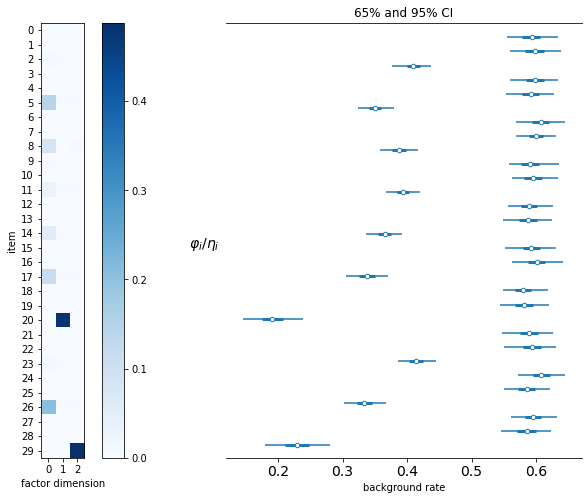

In [8]:
fig, ax = plt.subplots(1,2, figsize=(14,8))
D = factor.feature_dim
pcm = ax[0].imshow(factor.encoding_matrix().numpy()[::-1,:], vmin=0, cmap="Blues")
ax[0].set_yticks(np.arange(D))
ax[0].set_yticklabels(np.arange(D))
ax[0].set_ylabel("item")
ax[0].set_xlabel("factor dimension")
ax[0].set_xticks(np.arange(P))
ax[0].set_xticklabels(np.arange(P))

fig.colorbar(pcm, ax=ax[0], orientation = "vertical")
az.plot_forest(intercept_data, ax=ax[1])
ax[1].set_xlabel("background rate")
ax[1].set_ylim((-0.014,.466))
ax[1].set_title("65% and 95% CI")
#plt.savefig('mix_nonlinear_factorization_sepmf.pdf', bbox_inches='tight')
plt.show()

